# Keck HOBO data

HOBO sensors were strung down various trees in Rivendell. There are also HOBO sensors along the ground surface.

HOBOSensorMap.jpg gives the locations of the sensors. HOBODeviceProperties.xlsx gives the SensorID numbers, Tree Name, Sensor height above the ground, and the date deployed

Holly Maness did a calibration across all the sensors and produced a pickle file HOBOdata.p.

This code combines a lot commands into "def"..  
  (1) treetable = gettable(input_tree)    # gets all the data for the tree..  
  (2) 


In [1]:
#python 3
%pylab inline

import numpy as np
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pickle # works for python 3.x and optimizes speed (works in Python 2.x also, but is relatively slow)
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


In [2]:
A=pd.read_pickle('/Users/inez/DATA/KECK_HOBO/clean/HOBOGroundTempData.p')
df=pd.DataFrame(A)   # use sensorID as column heads
df.head()

,"(Kevin, 1.1)","(Kevin, 1.2)","(Kevin, 1.3)","(Kevin, 1.4)","(Kevin, 2.1)","(Kevin, 2.2)","(Kevin, 2.3)","(Kevin, 2.4)","(S, 2)","(S, 4)","(S, 3)","(S, 1)"
2010-01-23 11:30:00,6.004141,5.834007,5.784857,5.906786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-23 12:00:00,5.858582,5.639298,5.590148,5.687503,5.100541,5.149691,5.100541,5.075966,5.051391,5.125116,5.051391,5.002242
2010-01-23 12:30:00,6.125125,5.931361,5.979566,6.173330,5.590148,5.639298,5.614723,5.639298,6.752730,6.173330,6.076920,6.391668
2010-01-23 13:00:00,6.415298,6.222479,6.270684,6.415298,6.004141,6.076920,6.076920,6.125125,6.920973,6.824564,6.800934,6.608116
2010-01-23 13:30:00,6.776359,6.656321,6.704525,6.849139,6.656321,6.800934,6.872769,6.896398,7.327404,7.375609,7.518332,7.088272


In [3]:
df.dtypes

(Kevin, 1.1)    float64
(Kevin, 1.2)    float64
(Kevin, 1.3)    float64
(Kevin, 1.4)    float64
(Kevin, 2.1)    float64
(Kevin, 2.2)    float64
(Kevin, 2.3)    float64
(Kevin, 2.4)    float64
(S, 2)          float64
(S, 4)          float64
(S, 3)          float64
(S, 1)          float64
dtype: object

In [4]:
print (df.columns)

Index([('Kevin', '1.1'), ('Kevin', '1.2'), ('Kevin', '1.3'), ('Kevin', '1.4'),
       ('Kevin', '2.1'), ('Kevin', '2.2'), ('Kevin', '2.3'), ('Kevin', '2.4'),
             ('S', '2'),       ('S', '4'),       ('S', '3'),       ('S', '1')],
      dtype='object')


## plot the time series from a single sensor

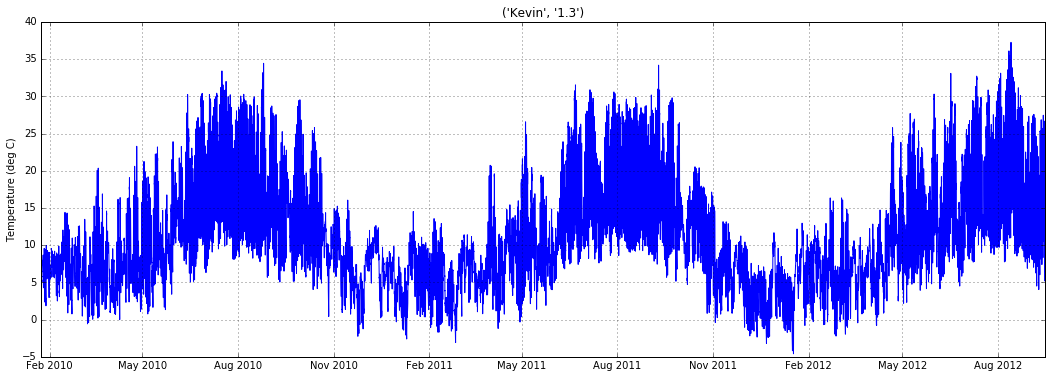

In [5]:
fig = plt.figure(figsize=(18,6)) 
plt.plot(df.ix[:,2])
plt.title(df.columns[2])
plt.ylabel('Temperature (deg C)')
plt.grid()

## define functions

In [6]:
# departure of each sensor from all-sensor average
def do_anomaly(row):
        return row-np.mean(row)    

In [7]:
#plot variable(time,sensor) for each tree
def plotz(Z,cmin,cmax,date_option):    
    #fig = plt.figure(figsize=(10,10)) 
    plt.pcolor(Z.transpose(),vmin=cmin,vmax=cmax,cmap='bwr')
    xtickmax=Z.shape[0]
    ytickmax=Z.shape[1]
    xtickrange=range(0,xtickmax)
    ytickrange=range(0,ytickmax)
    timestamp=Z.index
    if date_option==1:  # use actual dates
        dateonly=[ts.date() for ts in timestamp]     # drop the hours
        plt.xticks(xtickrange[: : 2000], dateonly[: : 2000])
        fig.autofmt_xdate()
    #plt.title('Anomalies in '+var+' for tree '+tree)
    sensor_name=Z.columns
    plt.yticks(ytickrange,sensor_name)    
    cb=plt.colorbar(orientation='horizontal')
    #cb.set_label('Anomaly in '+var)
    return 

## hourly averages

In [8]:
# hourly averages
print ('df: ', df.shape)
dfhour=df.resample('H').mean()
print ('dfhour: ', dfhour.shape)

df:  (46374, 12)
dfhour:  (23188, 12)


## Mean diurnal cycle

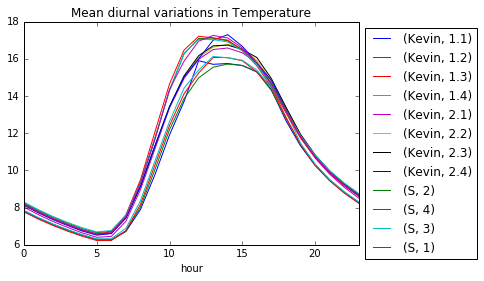

In [9]:
# "climatology" of diurnal cycle:  for each hour, average over entire period
df2=df
df2['hour']=[ts.hour for ts in df2.index]
dfhourmean=df2.groupby('hour').mean()
plt.figure(); dfhourmean.plot(); 
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Mean diurnal variations in Temperature')

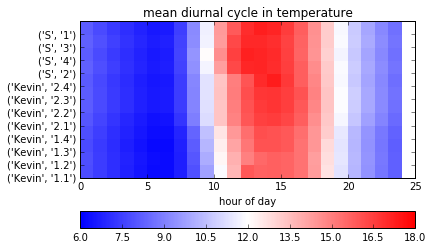

In [10]:
Z=dfhourmean
plt.figure, 
plotz(Z,6,18,0)
plt.title('mean diurnal cycle in temperature')
plt.xlabel('hour of day')

## mean diurnal cycle - compare sensors across all-sensor average

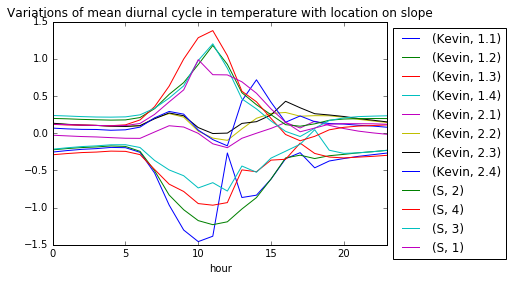

In [11]:
anomaly=dfhourmean.apply(do_anomaly,axis=1)
plt.figure(); anomaly.plot(); 
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title('Variations of mean diurnal cycle in temperature with location on slope')

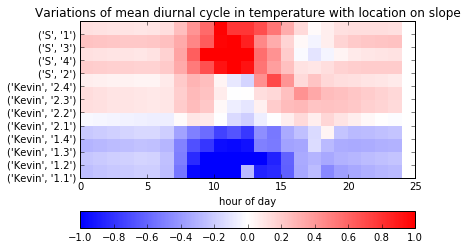

In [12]:
plotz(anomaly,-1,1,0)
plt.title('Variations of mean diurnal cycle in temperature with location on slope')
plt.xlabel('hour of day')

In [13]:
## compare sensors - 

/Users/inez/anaconda/lib/python3.5/site-packages/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


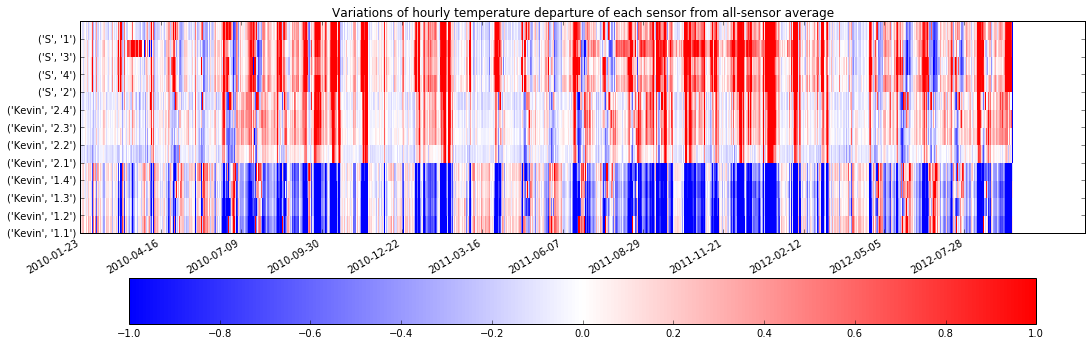

In [14]:
# departure(t) of hourly temperature from each sensor from average of all sensors(t)
anomaly2=dfhour.apply(do_anomaly,axis=1)    # for each time: average across all sensors
Z=anomaly2
fig = plt.figure(figsize=(18,6)) 
plotz(Z,-1, 1, 1)
plt.title('Variations of hourly temperature departure of each sensor from all-sensor average')